<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/datascience_0_pandasNumpyScipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preProcessing


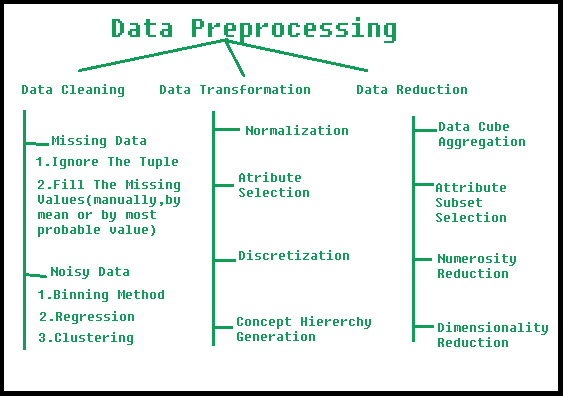

[link of img](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/
)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# set style for pyplot 
plt.style.use('seaborn-deep')
#plt.style.available

# random [number, dataset]


[0.60276338 0.54488318 0.4236548 ]
[22 37 24  7 25]
[ 2 13 53 41 66 30 45 43 78 44  7 26 33 63  8 16 24 56 77 42]
[3 0 3 0 3 3 3 3 3 0 2 2 2 2 2 3 0 3 3 2 3 0 3 3 2 3 2 3 2 2 3 0 3 0 3 2 3
 3 2 3 3 3 2 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 0 2 3 2 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 3 3 2 3 3 3 2 3 2 3 2 3 3 3 3 0 3 3 3 3 3 3]
shuffle a :[9 4 5 1]
['pooh' 'pooh']


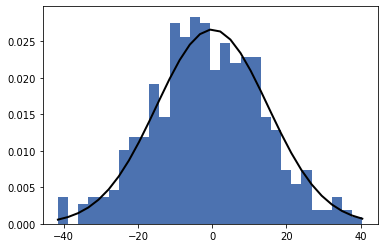

In [19]:
# make Random numbers

# https://numpy.org/doc/1.16/reference/routines.random.html
# https://towardsdatascience.com/a-cheat-sheet-on-generating-random-numbers-in-numpy-5fe95ec2286

np.random.seed(0) 
a = np.array([1,5,9,4])
np.random.shuffle(a)

print(
      np.random.random(3), # create random number between 0 1 - - it is normal distribution
      np.random.randint(1,40,5), # create random integer number (from,to,num)
      np.random.choice(80,20,replace=False), # equal to randint(0,80,20)
      np.random.choice(5, 100, p=[0.1, 0, 0.3, 0.6, 0]),
      f'shuffle a :{a}',
      sep = '\n'
      )

aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
print(np.random.choice(aa_milne_arr, 2, p=[0.5, 0.1, 0.1, 0.3]))
# ---------------------------
# make random & normal distribution
mu = 0
sigma = 15
normal_dist = np.random.normal(mu, sigma, 400)
count, bins, ignored = plt.hist(normal_dist, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='k');plt.show()


# Create random dataset

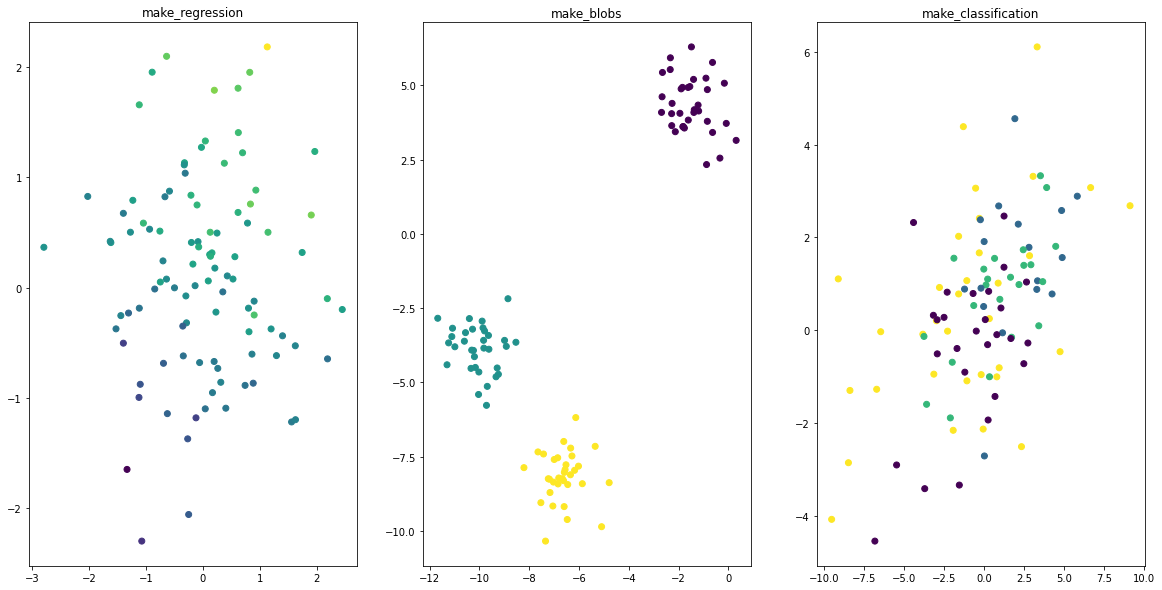

In [26]:
from sklearn.datasets import make_classification, make_regression, make_blobs
# https://scikit-learn.org/stable/datasets.html

# '''''''''''''''''''''''''''''''''''''''''''''''''''
x, y = make_classification(n_samples = 100,
    n_features = 10,
    n_informative = 9, 
    n_redundant = 1,
    n_classes = 4,
    weights = [.25, .15, .2, .3],
    random_state = 1)
# '''''''''''''''''''''''''''''''''''''''''''''''''''
x1, y1, coed = make_regression(n_samples = 100,
    n_features = 3,
    n_informative = 3,
    n_targets = 1,
    noise = 0.0,
    coef = True,
    random_state = 1)
# '''''''''''''''''''''''''''''''''''''''''''''''''''
x2, y2 = make_blobs(n_samples = 100,
    n_features = 2,
    centers = 3,
    cluster_std = 0.9,
    shuffle = True,
    random_state = 1)
# '''''''''''''''''''''''''''''''''''''''''''''''''''
# '''''''''''''''''''''''''''''''''''''''''''''''''''
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,3,1);ax1.scatter(x1[:,0], x1[:,1], c=y1);ax1.set_title('make_regression')
ax2 = fig.add_subplot(1,3,2);ax2.scatter(x2[:,0], x2[:,1], c=y2);ax2.set_title('make_blobs')
ax3 = fig.add_subplot(1,3,3);ax3.scatter(x[:,2], x[:,8], c=y);ax3.set_title('make_classification')

plt.show()

In [28]:
# ........................................
# Read / rename    of dataset with PANDAS
# ........................................
import pandas as pd
import numpy as np
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

print('<< dataset columns >>', df.columns)  # return columns name 

df = df.rename(columns = {'unit price':'uprice','ext price':'exprice'})
df

<< dataset columns >> Index(['account number', 'name', 'sku', 'quantity', 'unit price', 'ext price',
       'date'],
      dtype='object')


,account number,name,sku,quantity,uprice,exprice,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
1495,737550,"Fritsch, Russel and Anderson",S1-06532,12,55.80,669.60,2014-12-30 13:38:13
1496,786968,"Frami, Hills and Schmidt",S1-06532,37,13.14,486.18,2014-12-30 21:42:17
1497,239344,Stokes LLC,S2-10342,14,38.75,542.50,2014-12-30 22:45:19
1498,642753,Pollich LLC,S2-82423,3,65.97,197.91,2014-12-31 10:36:24


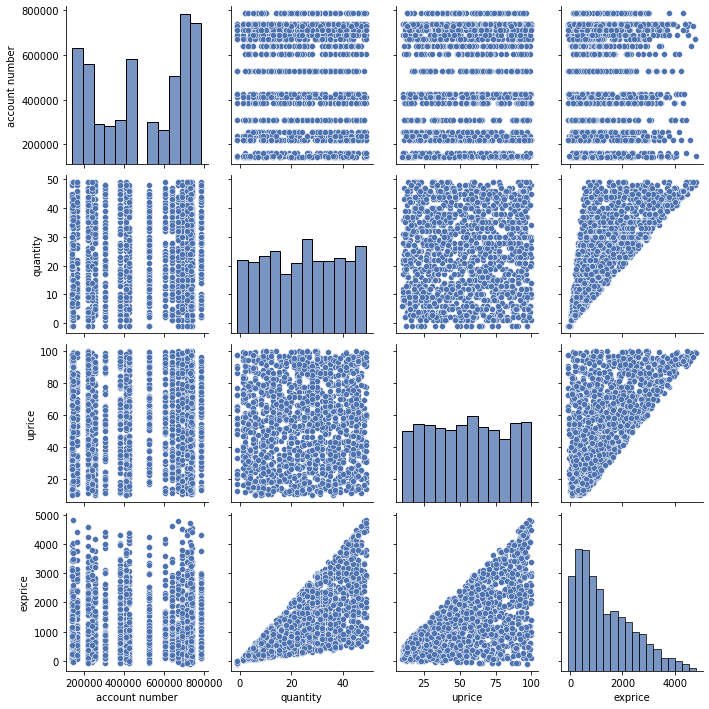

In [ ]:
sb.pairplot(df)

# Correlation

feature selection
find relation between two feature 

https://www.geeksforgeeks.org/mathematics-covariance-and-correlation/


cov of quantity vs unit price: 
  [[208.49238648   8.70238503]
 [  8.70238503 670.97925946]]

Covarinace matrix of arr: 
 2997.0
Covariance is a measure of how two variables change together. If they         tend to increase together, it will be positive
 16781.289945798173


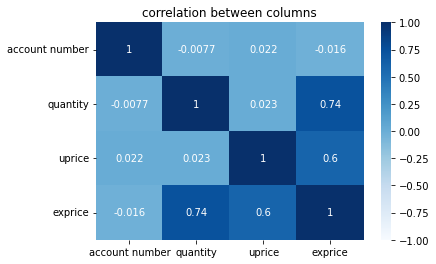

In [42]:
# covariance
# ============================================================================
# The Numpy cov() function is used to measure the strength of correlation
# between two or more than two sets of variables 

arr = np.array([[1, 1], [1, 20]])
arr2 = np.array([1, 10,100])

print('\ncov of quantity vs unit price: \n ',np.cov(df.quantity, df.uprice)) # ????
print("\nCovarinace matrix of arr: \n", np.cov(arr2))
print('Covariance is a measure of how two variables change together. If they \
        tend to increase together, it will be positive\n',df.exprice.cov(df.uprice))
# ============================================================================
# When the covariance is normalized (by dividing by the standard
# deviations of both series), it is called the correlation coefficient

corr = df.corr() 
corrplot = sb.heatmap(corr, annot = True, cmap='Blues', xticklabels = corr.columns,
                      yticklabels = corr.columns, vmin = -1, vmax = +1)
corrplot.set_title('correlation between columns')
plt.show()

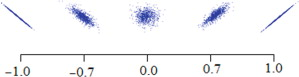

https://vsni.co.uk/blogs/pearson-correlation-vs-simple-linear-regression

In [ ]:
# pearson 
# measures the strength of the linear relationship between two variables
#  It has a value between -1 to 1, 
# with a value of -1 meaning a total negative linear correlation,
# 0 being no correlation, and + 1 meaning a total positive correlation
# FORMULE : R = cov (X, Y) / (std(x) stx(y))

from scipy.stats import pearsonr
pearson_coef, p_value = pearsonr(df.exprice, df.uprice)
print(f'coef :{pearson_coef}, p_value: {p_value}') 

coef :0.5971385745771371, p_value: 1.2668652524070644e-145


In [ ]:
# SPEARman correlation
# measures the strength and direction of monotonic association between two variables.
'''
The Spearman correlation is less sensitive to strong outliers than the Pearson correlation 
That is because Spearman's ρ limits the outlier to the value of its rank.
'''
from scipy.stats import spearmanr
spearman_coef, p_value = spearmanr(df.exprice, df.priceu)
print(f'coef :{spearman_coef}, p_value: {p_value}')

coef :0.5741825250806364, p_value: 2.7360366114796826e-132


[spearMan VS Pearson](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8)

In [ ]:
# chi square TEST  hypothesis testing
# for categorical data
# -------------------------------------------------
# 1  --> Investigate whether events are independent or relevant
# 2  --> for measure goodness of fit
# -------------------------------------------------
# P_VALUE : It is a way to reject the null hypothesis and accept the alternative hypothesis 
# if p_value > 0.05 fail to reject null hypothesis
# if p_value < 0.05 we can reject null hypothesis
# -------------------------------------------------
# Degree of freedom / categorical: cluster minus 1
# -------------------------------------------------
# chi2 = Sum [(Observed_data - expectadet_data)**2/expectadet_data]
# -------------------------------------------------
from scipy.stats import chi2_contingency
import pandas as pd

observed_data = pd.crosstab(df.name, df.sku) 
chi2, p_value, degreeOfFreedom, expected = chi2_contingency(observed_data.values)
if p_value < 0.05:
  print('null hypothesis is correct')
else:
  print('null hypothesis is rejected')


# """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# Loading wine data
X, y = datasets.load_wine(return_X_y=True)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
print('result of chi squer test to find best 4 feature \n',fit.scores_)
X_new=test.fit_transform(X, y)
print(f'new x:\n {X_new[:4]} \n old x: \n{X[:4]}')

null hypothesis is rejected
result of chi squer test to find best 4 feature 
 [5.44549882e+00 2.80686046e+01 7.43380598e-01 2.93836955e+01
 4.50263809e+01 1.56230759e+01 6.33343081e+01 1.81548480e+00
 9.36828307e+00 1.09016647e+02 5.18253981e+00 2.33898834e+01
 1.65400671e+04]
new x:
 [[ 127.      3.06    5.64 1065.  ]
 [ 100.      2.76    4.38 1050.  ]
 [ 101.      3.24    5.68 1185.  ]
 [ 113.      3.49    7.8  1480.  ]] 
 old x: 
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]]


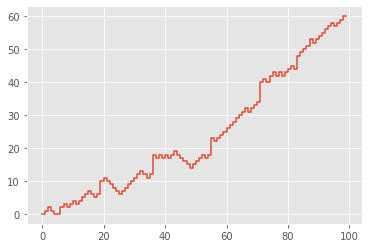

In [ ]:
# Random walk  its a game for see normal distribution is everywhere
# if dice 1 or 2  --> step -1
# if dice 3 4 5 --> step +1
# if dice is 6 --> step + next dice number
t = 100
step = 0
steps = []
while t > 0 :
  dice = np.random.randint(1,7)
  if dice <3:
    step = max(0, step-1)
  elif dice <= 5:
    step += 1
  else:
    num = np.random.randint(1,7)
    step += num
  steps.append(step)
  t -= 1

plt.step(np.arange(100),steps)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


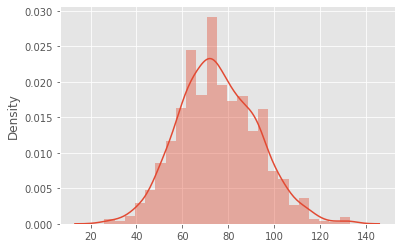

random walk mean:  75.479 
random walk std 16.960883202239206
MIN : 26.0
Max: 133.0


In [ ]:
report = np.empty(0)
for _ in range(1000):
  t = 100
  step = 0
  steps = []
  while t > 0 :
    dice = np.random.randint(1,7)
    if dice <3:
      step = max(0, step-1)
    elif dice <= 5:
      step += 1
    else:
      num = np.random.randint(1,7)
      step += num
    steps.append(step)
    t -= 1
  report = np.append(report, steps[-1])
sb.distplot(report)
plt.show()
print('random walk mean: ',np.mean(report),'\nrandom walk std',np.std(report))
print(f'MIN : {np.min(report)}\nMax: {np.max(report)}')


# data cleaning


In [ ]:
import pandas as pd
from seaborn import load_dataset

data = pd.read_csv('bank.csv', sep=';')

print(data.describe())  # describe the dataset

data = data.rename({'education':'edu'})

data.columns # columns of dataset

data.info() # info about dataset

data.isnull() # return objects of dataset True for null 

data.fillna({'job':'unemployd','balance':'zero'}) # fill na values of columns dataset

data.fillna(method = 'ffill') # fill na values with previous data in dataset
data

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  
<class 'pandas.cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
data[data.duplicated()]                       # returns rows with duplicate data
data.drop_duplicates()                        # drops every duplicated data
data.drop_duplicates(['job'])                 # drops job columns duplicated data
data.reset_index(drop = True, inplace = True) # reset index and drop previous indexes

In [ ]:
print('value counts :',data.job.value_counts()) # Count special columns

# Group by 
new_data = data.groupby(data['job']) # set each job in index and recreate dataset based on them
print(new_data.mean())

# crosstab 
pd.crosstab(data.job, data.housing) # job as index and housing as columns

value counts : management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
                     age      balance        day    duration  campaign  \
job                                                                      
admin.         39.682008  1226.736402  16.324268  234.669456  2.631799   
blue-collar    40.156448  1085.161734  15.482030  278.161734  2.846723   
entrepreneur   42.011905  1645.125000  15.255952  285.476190  2.589286   
housemaid      47.339286  2083.803571  15.294643  292.633929  2.500000   
management     40.540764  1766.928793  16.254902  260.536636  2.973168   
retired        61.869565  2319.191304  15.556522  285.656522  2.465217   
self-employed  41.453552  1392.409836  16.180328  264.125683  3.278689   
services       38.570743  1103.956835  15.5

housing,no,yes
job,,
admin.,176,302
blue-collar,251,695
entrepreneur,74,94
housemaid,73,39
management,466,503
retired,180,50
self-employed,95,88
services,132,285
student,64,20


In [ ]:
# pivot table 
pd.pivot_table(data, index = 'marital', columns = 'loan') 
# set selected row and column to mpre info

age                 balance              campaign            \
loan             no        yes           no         yes        no       yes   
marital                                                                       
divorced  45.593607  44.900000  1170.778539  886.900000  2.621005  2.522222   
married   43.670648  42.335541  1554.146758  992.578366  2.801195  3.086093   
single    33.913168  34.027027  1567.132634  704.736486  2.766221  2.648649   

                day               duration                  pdays             \
loan             no        yes          no         yes         no        yes   
marital                                                                        
divorced  15.769406  15.677778  283.052511  260.644444  43.865297  14.311111   
married   15.901024  15.931567  256.473123  256.816777  39.261945  34.353201   
single    16.070611  15.567568  274.746183  273.574324  44.013359  37.608108   

          previous            
loan            no       yes  
marital                       
divorced  0.504566  0.122222  
married   0.529010  0.467991  
single    0.646947  0.614865

In [ ]:
# convert categorical data into numeric data
data2 = data.drop(['job','marital','education','month','age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',],axis = 1)

print(data2.poutcome.unique())
pd.get_dummies(data2)

['unknown' 'failure' 'other' 'success']


,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,79,1,-1,0,0,0,0,1,1,0
1,220,1,339,4,1,0,0,0,1,0
2,185,1,330,1,1,0,0,0,1,0
3,199,4,-1,0,0,0,0,1,1,0
4,226,1,-1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4516,329,5,-1,0,0,0,0,1,1,0
4517,153,1,-1,0,0,0,0,1,1,0
4518,151,11,-1,0,0,0,0,1,1,0
4519,129,4,211,3,0,1,0,0,1,0


# normalize data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([1.61764706, 2.05882353, 2.35294118, ..., 5.58823529, 1.32352941,
       3.67647059])

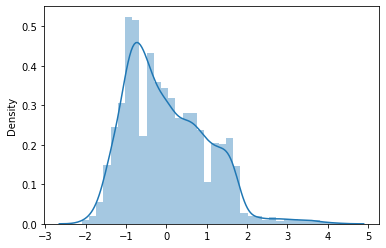

In [ ]:
 
import seaborn as sb
from sklearn.preprocessing import scale, normalize, minmax_scale
# scale is Z score  x-mean / std 
# normalize  x / |x| - > norm in manhatan its sum(|x1| + |x2| + ...)
# in euclidance is sqrt(sum(x1**2 + x2**2 +...))
# minmax_scale distributed data in min and max scale 
scale_age = scale(data.age)
sb.distplot(scale_age)
normalize_data = normalize([data.duration,data.age], norm='l1', axis = 1)
scaled_data = minmax_scale(data.age, feature_range = (0,10))
scaled_data

In [ ]:
# quartile  to find outlier
import numpy as np
df = pd.DataFrame(np.array([1,5,6,9,12,25,220]))

def percentile(data,k):
    n = len(data)
    p = (k * n)/100
    c = p - int(p)
    if c: # p isnt integer
      return data[int(p)]
    else: # p is integer
      return (data[int(p)] + data[int(p) - 1]) / 2
    return p
percentile([1,5,6,9,12,25,220],50)
df.quantile(0.5)

0    9.0
Name: 0.5, dtype: float64

In [ ]:
# who is the OUTLIER?
up_extrem = q3 + (1.5 * iqr) # iqr == interquartile range
down_extrem = q1 - (1.5 * iqr) # iqr == interquartile range
# if some data greater than up_extrem or lower than down extrem, its OUTLIER
# box plots are best way for detecting and visualizing outliers

In [ ]:
# design style of table
data.head().style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': 'background-color: yellow; font-size: 1em;'}])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


To be continue . . .
--------

iris dataset


```
machin learning algorithms with sklearn :
kmeans
decision tree 
regression 
KNN 
kfold ( split data )
```
hyper parameter tuning





work with image data

work with text data 

entropy


what is signal sensor and DSP




